In [1]:
import ROOT

Welcome to JupyROOT 6.24/04


In [2]:
# TODO: move this to common tools 
def explore_directory(directory, depth=0):
    indent = " - " * depth
    print(f"{indent}Directory: {directory.GetName()}")
    
    keys = directory.GetListOfKeys()
    for key in keys:
        obj = key.ReadObj()
        if isinstance(obj, ROOT.TDirectory):
            explore_directory(obj, depth + 1)
        else:
            print(f"{indent}  {obj.GetName()}")

In [3]:
data_recon_filepath = '/work/halld/home/viducic/data/acceptance_study/data_s18_042050_042059_monitoring.root'

data_file = ROOT.TFile(data_recon_filepath, 'READ')


In [4]:
independent_dir = data_file.Get('Independent')
tree_dir = data_file.Get('pipkmks__ks_pippim__B4_M16')

In [5]:
# explore_directory(independent_dir)

In [6]:
# explore_directory(tree_dir)

### Directories to check:
- Independent
    - Hist_DetectorMatchParams
        - ReconstructedPID
            - K-/K+
        - TruePID
            - K-/K+
    - Hist_DetectorPID
        - BCAL 
            - DeltaBetaVsP_K-
            - DeltaTVsP_K-
        - FCAL
            - DeltaBetaVsP_K-
            - DeltaTVsP_K-
        - CCAL
            - DeltaBetaVsP_K-
            - DeltaTVsP_K-
        - SC
            - DeltadEdXVsP_K-
            - DeltaBetaVsP_K-
            - DeltaTVsP_K-
        - TOF 
            - DeltadEdXVsP_K-
            - DeltaBetaVsP_K-
            - DeltaTVsP_K-
        - CDC
            - DeltadEdXVsP_Int_K-
            - DeltadEdXVsP_Amp_K-
        - FDC 
            - DeltadEdXVsP_K-
        - DIRC
            - NumPhotons_K-
            - ThetaCVsP_K-
            - Ldiff_kpiVsP_K-
            - Ldiff_pkVsP_K-
    - Hist_DetectedParticleKinematics
        - K- 
    - Hist_ThrownParticleKinematics
        - K-
    - Hist_ReconnedThrownKinematics
        - K-
    - Hist_GenReconTrackComparison
        - K-
            - Pulls
        - < other hists here >
    - Combo_Construction
        - Missing_Mass
            - MissingMassVsBeamEnergy_K
        - PID 
            - K- 

- pipkmks__ks_pippim__B4_M16
    - Hist_KinFitResults
        - Step0__Photon_Proton__Pi+_K-_KShort_Proton
            - K- 
    - Hist_PID
        - K- 
            - SC
            - TOF
            - BCAL
            - FCAL
            - CCAL
            - CDC
            - FDC
            - DIRC
            - Throwns
        - < other hists >
    - Hist_ParticleComboKinematics
        - Step0__Photon_Proton__Pi+_K-_KShort_Proton
            - K- 






In [18]:
# using the markdown above this, write out a list of all the directories so that i can iterate over it
# its bad code i know but i had copilot chat do it for me :)
paths = [
    # PATHS WITH MULTIPLE HISTOGRAMS AT THE END
    'Independent/Hist_DetectorMatchParams/ReconstructedPID/K{}',
    'Independent/Hist_DetectorMatchParams/TruePID/K{}',
    'Independent/Hist_DetectedParticleKinematics/K{}',
    'Independent/Hist_ThrownParticleKinematics/K{}',
    'Independent/Hist_ReconnedThrownKinematics/K{}',
    'Independent/Hist_GenReconTrackComparison/K{}/Pulls',
    'Independent/Hist_GenReconTrackComparison/K{}',
    'Independent/Combo_Construction/PID/K{}',
    '{1}__B4_M16/Hist_KinFitResults/Step0__Photon_Proton__Pi{2}_K{0}_KShort_Proton/K{0}',
    '{1}__B4_M16/Hist_PID/K{0}',
    '{1}__B4_M16/Hist_ParticleComboKinematics/Step0__Photon_Proton__Pi{2}_K{0}_KShort_Proton/K{0}',
    # SINGLE HISTOGRAMS
    'Independent/Hist_DetectorPID/BCAL/DeltaBetaVsP_K{}',
    'Independent/Hist_DetectorPID/BCAL/DeltaTVsP_K{}',
    'Independent/Hist_DetectorPID/FCAL/DeltaBetaVsP_K{}',
    'Independent/Hist_DetectorPID/FCAL/DeltaTVsP_K{}',
    'Independent/Hist_DetectorPID/CCAL/DeltaBetaVsP_K{}',
    'Independent/Hist_DetectorPID/CCAL/DeltaTVsP_K{}',
    'Independent/Hist_DetectorPID/SC/DeltadEdXVsP_K{}',
    'Independent/Hist_DetectorPID/SC/DeltaBetaVsP_K{}',
    'Independent/Hist_DetectorPID/SC/DeltaTVsP_K{}',
    'Independent/Hist_DetectorPID/TOF/DeltadEdXVsP_K{}',
    'Independent/Hist_DetectorPID/TOF/DeltaBetaVsP_K{}',
    'Independent/Hist_DetectorPID/TOF/DeltaTVsP_K{}',
    'Independent/Hist_DetectorPID/CDC/DeltadEdXVsP_Int_K{}',
    'Independent/Hist_DetectorPID/CDC/DeltadEdXVsP_Amp_K{}',
    'Independent/Hist_DetectorPID/FDC/DeltadEdXVsP_K{}',
    'Independent/Hist_DetectorPID/DIRC/NumPhotons_K{}',
    'Independent/Hist_DetectorPID/DIRC/ThetaCVsP_K{}',
    'Independent/Hist_DetectorPID/DIRC/Ldiff_kpiVsP_K{}',
    'Independent/Hist_DetectorPID/DIRC/Ldiff_pkVsP_K{}',
    'Independent/Combo_Construction/Missing_Mass/MissingMassVsBeamEnergy_K{}',
    '{1}__B4_M16/Hist_PID/K{0}/SC',
    '{1}__B4_M16/Hist_PID/K{0}/TOF',
    '{1}__B4_M16/Hist_PID/K{0}/BCAL',
    '{1}__B4_M16/Hist_PID/K{0}/FCAL',
    '{1}__B4_M16/Hist_PID/K{0}/CCAL',
    '{1}__B4_M16/Hist_PID/K{0}/CDC',
    '{1}__B4_M16/Hist_PID/K{0}/FDC',
    '{1}__B4_M16/Hist_PID/K{0}/DIRC',
    '{1}__B4_M16/Hist_PID/K{0}/Throwns'
    '{1}__B4_M16/NumParticleCombos',
    '{1}__B4_M16/NumEventsSurvivedAction',
    '{1}__B4_M16/NumEventsSurvivedAction_BeamE',
    '{1}__B4_M16/NumEventsWhereTrueComboSurvivedAction',
    '{1}__B4_M16/NumEventsWhereTrueComboSurvivedAction_BeamE',
    '{1}__B4_M16/NumCombosSurvivedAction',
    '{1}__B4_M16/NumCombosSurvivedAction1D',
    '{1}__B4_M16/ComboConstruction_NumEventsSurvived',
    '{1}__B4_M16/ComboConstruction_NumCombosSurvived',
    '{1}__B4_M16/ComboConstruction_NumCombosSurvived2D'
]

In [19]:
def get_hists(channel, file, paths):
    """
    acceptable charges are "+" or "-"
    """
    if channel not in ["pipkmks", "pimkpks"]:
        raise ValueError("charge must be either '+' or '-'")
    else:
        if channel == "pipkmks":
            charge = "-"
            pi_charge = "+"
        elif channel == "pimkpks":
            charge = "+"
            pi_charge = "-"
        hists = []
        for path in paths:
            object = file.Get(path.format(charge, channel, pi_charge))
            if isinstance(object, ROOT.TH1):
                hists.append(object)
            elif isinstance(object, ROOT.TDirectory):
                keys = object.GetListOfKeys()
                for key in keys:
                    obj = key.ReadObj()
                    if isinstance(obj, ROOT.TH1):
                        hists.append(obj)
        return hists
            


In [20]:
km_hists = get_hists("pipkmks", data_file, paths)
kp_hists = get_hists("pimkpks", data_file, paths)

In [21]:
print(len(km_hists))
print(len(kp_hists))

133
133


Info in <TCanvas::Print>: pdf file data_recon_study.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file data_recon_study.pdf
Info in <TCanvas::Print>: Current canvas added 

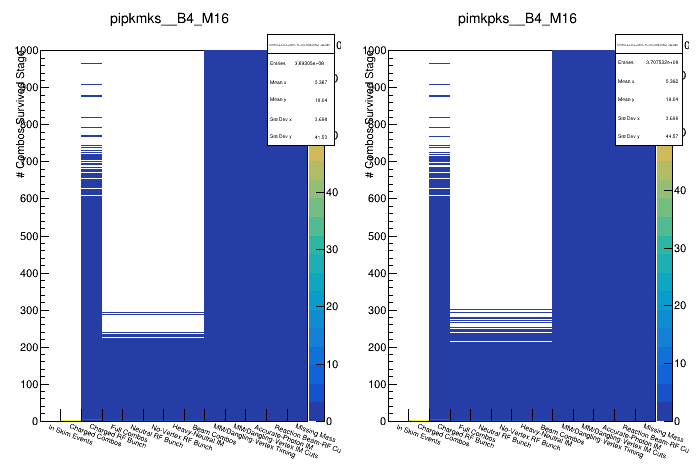

In [22]:
# TODO: better titles for histograms
c = ROOT.TCanvas()
c.Print("data_recon_study.pdf[", "pdf")
for i, hist in enumerate(km_hists):
    c.SetTitle(hist.GetName())
    c.Clear()
    if(type(hist) in [ROOT.TH2I, ROOT.TH2F, ROOT.TH2D]):
        c.Divide(2,1)
        c.cd(1)
        hist.Draw("colz")
        c.cd(2)
        kp_hists[i].Draw("colz")
    else:
        c.Divide(1, 0)
        c.cd()
        hist.SetLineColor(ROOT.kBlue)
        kp_hists[i].SetLineColor(ROOT.kRed)
        kp_hists[i].Draw()
        hist.Draw("same")
    c.Draw() 
    c.Print("data_recon_study.pdf", "pdf")
c.Print("data_recon_study.pdf]", "pdf")
